## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# importing library file into csv into notebook

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
url='https://drive.google.com/file/d/19FfTrGFiIb-Aw-8gNMiggCwLS_65EtpD/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.shape


(3333, 20)

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## *Both the missing and duplicate values are same.





In [ ]:
df.value_counts()

State  Account length  Area code  International plan  Voice mail plan  Number vmail messages  Total day minutes  Total day calls  Total day charge  Total eve minutes  Total eve calls  Total eve charge  Total night minutes  Total night calls  Total night charge  Total intl minutes  Total intl calls  Total intl charge  Customer service calls  Churn
AK     1               408        No                  No               0                      175.2              74               29.78             151.7              79               12.89             230.5                109                10.37               5.3                 3                 1.43               1                       False    1
NV     87              510        No                  Yes              39                     82.6               113              14.04             224.4              63               19.07             163.6                88                 7.36                9.5                 1              

# In this we are going to see churn rate of churning percentage

In [ ]:
df ['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
true_churn_percentage=((3333-2850)/3333)*100
print(true_churn_percentage)

14.491449144914492


In [ ]:
false_churn_percentage=((3333-483)/3333)*100
print(false_churn_percentage)

85.5085508550855


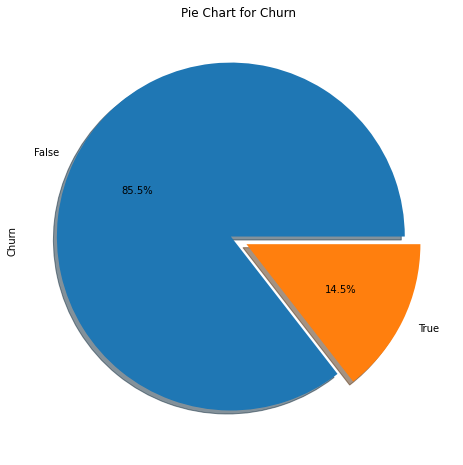

In [ ]:
df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=0,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

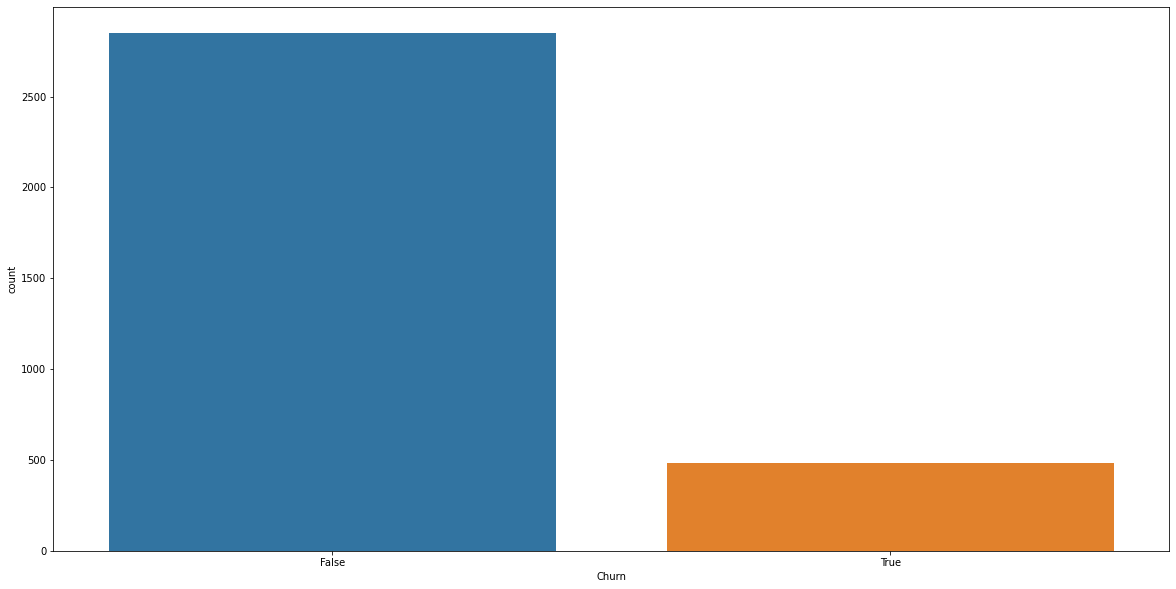

In [ ]:
sns.countplot(x= df.Churn)

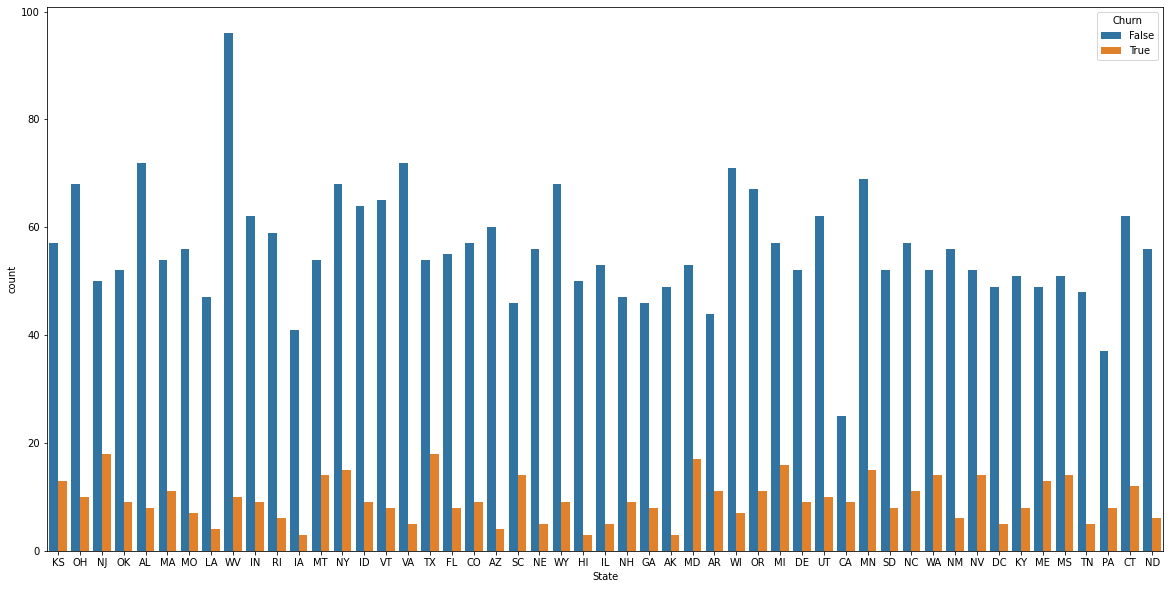

In [ ]:
sns.countplot(x='State', hue="Churn", data= df)
plt.rcParams['figure.figsize'] = (20,10)

# Grouping churn with respect to state.

In [ ]:
df.groupby(['State'])['Churn']

In [ ]:
df.groupby(['State'])['Churn'].mean()*100

State
AK     5.769231
AL    10.000000
AR    20.000000
AZ     6.250000
CA    26.470588
CO    13.636364
CT    16.216216
DC     9.259259
DE    14.754098
FL    12.698413
GA    14.814815
HI     5.660377
IA     6.818182
ID    12.328767
IL     8.620690
IN    12.676056
KS    18.571429
KY    13.559322
LA     7.843137
MA    16.923077
MD    24.285714
ME    20.967742
MI    21.917808
MN    17.857143
MO    11.111111
MS    21.538462
MT    20.588235
NC    16.176471
ND     9.677419
NE     8.196721
NH    16.071429
NJ    26.470588
NM     9.677419
NV    21.212121
NY    18.072289
OH    12.820513
OK    14.754098
OR    14.102564
PA    17.777778
RI     9.230769
SC    23.333333
SD    13.333333
TN     9.433962
TX    25.000000
UT    13.888889
VA     6.493506
VT    10.958904
WA    21.212121
WI     8.974359
WV     9.433962
WY    11.688312
Name: Churn, dtype: float64

# we get the percentage let us see top 10 states who are moving towards churn

In [ ]:
top_10_states=(df.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = False).head(10)

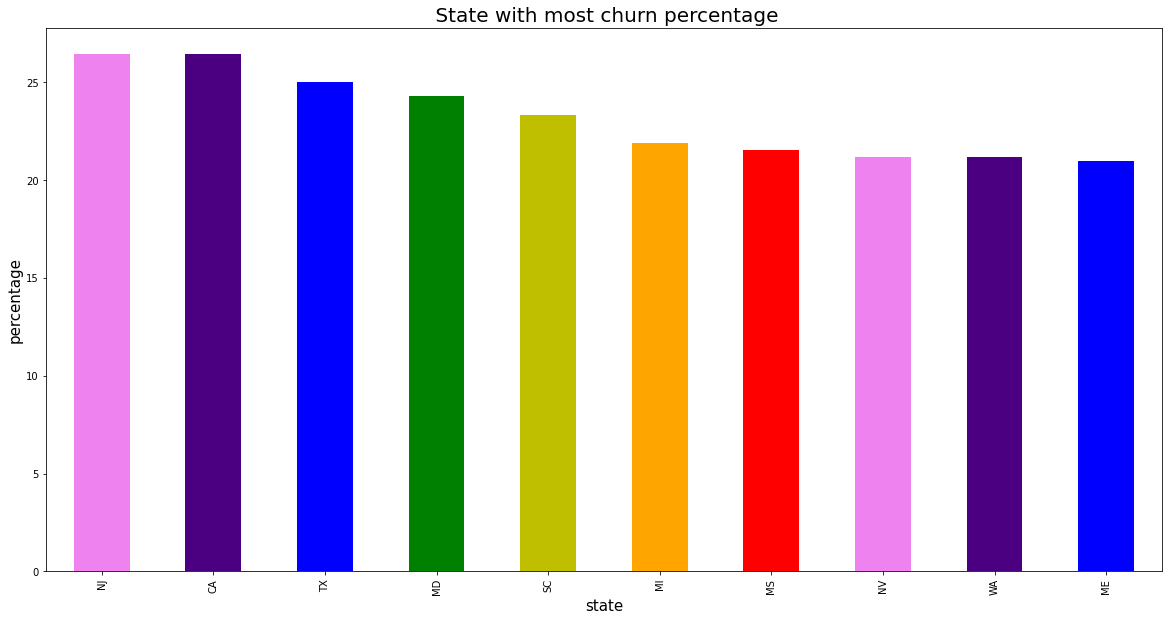

In [ ]:
top_10_states.plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

# Here we can see states NJ ans CA have same churn percentage

# plot churn percentage pi plot of NJ state

In [ ]:
state_NJ =df[df['State']=='NJ']
state_NJ

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
39,NJ,149,408,No,No,0,140.4,94,23.87,271.8,92,23.10,188.3,108,8.47,11.1,9,3.00,1,False
70,NJ,138,408,No,No,0,241.8,93,41.11,170.5,83,14.49,295.3,104,13.29,11.8,7,3.19,3,False
89,NJ,128,415,No,No,0,237.9,125,40.44,247.6,93,21.05,208.9,68,9.40,13.9,4,3.75,1,True
116,NJ,64,510,No,No,0,162.6,83,27.64,152.3,109,12.95,57.5,122,2.59,14.2,3,3.83,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,NJ,75,415,No,Yes,42,248.9,93,42.31,170.8,108,14.52,104.5,91,4.70,11.2,8,3.02,1,False
3126,NJ,108,415,No,No,0,239.3,102,40.68,223.4,127,18.99,251.4,104,11.31,10.6,6,2.86,0,False
3136,NJ,107,408,No,Yes,36,96.3,83,16.37,179.6,91,15.27,166.3,121,7.48,10.3,2,2.78,1,False
3248,NJ,93,415,No,No,0,146.3,85,24.87,216.6,95,18.41,233.0,82,10.49,11.5,3,3.11,0,False


In [ ]:
state_NJ.shape

(68, 20)

# plot churn percentage pi plot of CA state

In [ ]:
state_CA =df[df['State']=='CA']
state_CA

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
61,CA,116,415,No,Yes,34,268.6,83,45.66,178.2,142,15.15,166.3,106,7.48,11.6,3,3.13,2,False
131,CA,75,408,No,No,0,166.3,125,28.27,158.2,86,13.45,256.7,80,11.55,6.1,5,1.65,1,False
356,CA,124,408,Yes,No,0,244.6,89,41.58,188.8,80,16.05,206.0,114,9.27,11.3,4,3.05,1,False
372,CA,151,415,Yes,No,0,218.0,57,37.06,114.4,88,9.72,269.2,95,12.11,12.4,1,3.35,0,True
496,CA,93,415,No,Yes,36,178.7,134,30.38,178.6,102,15.18,126.8,82,5.71,8.0,4,2.16,2,False
654,CA,96,510,No,Yes,31,183.4,126,31.18,195.5,106,16.62,180.1,93,8.10,10.5,5,2.84,1,False
655,CA,79,510,No,No,0,157.6,85,26.79,194.1,92,16.50,231.5,86,10.42,9.4,10,2.54,5,True
765,CA,113,415,No,No,0,187.6,97,31.89,208.2,118,17.70,158.9,101,7.15,8.7,6,2.35,2,False
862,CA,75,510,No,Yes,38,163.6,132,27.81,146.7,113,12.47,345.8,115,15.56,13.1,3,3.54,3,False
954,CA,158,510,No,No,0,155.9,123,26.50,224.2,112,19.06,221.0,116,9.95,8.6,8,2.32,2,False


In [ ]:
state_CA.shape

(34, 20)

In [ ]:
state_CA ['Churn'].value_counts()

False    25
True      9
Name: Churn, dtype: int64

In [ ]:
false_CA_percentage=((34-25)/34)*100
false_CA_percentage

26.47058823529412

In [ ]:
true_CA_percentage=((34-9)/34)*100
true_CA_percentage

73.52941176470588

In [ ]:
state_NJ ['Churn'].value_counts()

False    50
True     18
Name: Churn, dtype: int64

In [ ]:
true_NJ_percentage=((68-50)/68)*100
true_NJ_percentage

26.47058823529412

In [ ]:
true_NJ_percentage=((68-18)/68)*100
true_NJ_percentage

73.52941176470588

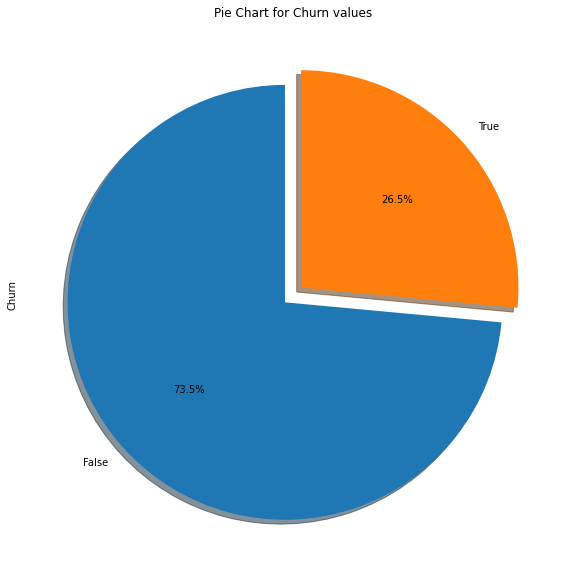

In [ ]:
state_CA ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(10,10))
plt.title('Pie Chart for Churn values')
plt.show()

# As we see top 10 states ehich are moving towards churn let us see last 10 states which are moving towards churn

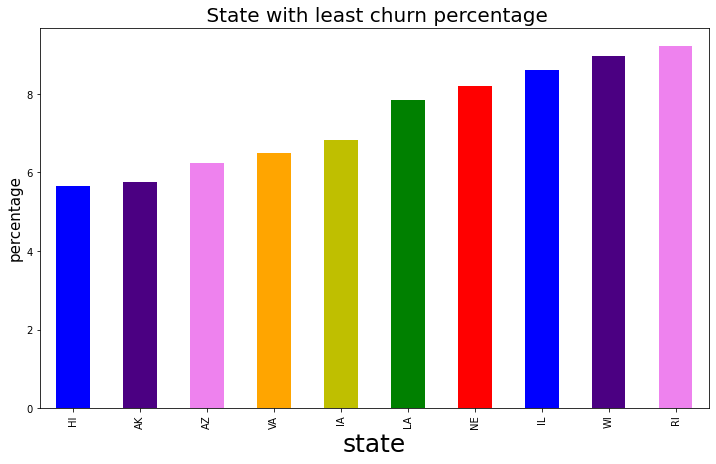

In [ ]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = True).head(10).plot.bar(color = ['b','indigo','violet','orange','y','g','r'])
plt.title(" State with least churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 25)
plt.ylabel('percentage', fontsize = 15)
plt.show()

Least percentage of cHurn is in state HI let us plot churn percentage plot for HI

In [ ]:
state_HI =df[df['State']=='HI']
state_HI

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
29,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
74,HI,85,415,No,No,0,235.8,109,40.09,157.2,94,13.36,188.2,99,8.47,12.0,3,3.24,0,False
276,HI,148,510,Yes,No,0,218.9,88,37.21,208.0,85,17.68,203.3,99,9.15,11.1,4,3.00,0,False
480,HI,166,408,No,No,0,181.4,108,30.84,253.8,54,21.57,112.3,94,5.05,11.6,6,3.13,1,False
595,HI,87,408,No,Yes,28,151.4,95,25.74,152.4,97,12.95,250.1,109,11.25,0.0,0,0.00,1,False
705,HI,99,415,No,No,0,62.9,81,10.69,231.0,64,19.64,168.9,121,7.60,8.5,5,2.30,1,False
794,HI,73,408,No,No,0,187.3,118,31.84,239.7,90,20.37,167.5,108,7.54,15.1,2,4.08,1,False
828,HI,64,415,No,No,0,194.2,147,33.01,173.4,87,14.74,268.7,114,12.09,5.5,2,1.49,2,False
860,HI,169,415,No,No,0,179.2,111,30.46,175.2,130,14.89,228.6,92,10.29,9.9,6,2.67,2,False
875,HI,132,415,No,Yes,15,154.6,128,26.28,245.6,106,20.88,148.6,90,6.69,9.1,4,2.46,1,False


In [ ]:
state_HI['Churn'].value_counts()

False    50
True      3
Name: Churn, dtype: int64

In [ ]:
state_HI.shape

(53, 20)

In [ ]:
true_HI_percentage=((53-50)/53)*100

false_HI_percentage=((53-3)/53)*100
print(false_HI_percentage)
print(true_HI_percentage)

94.33962264150944
5.660377358490567


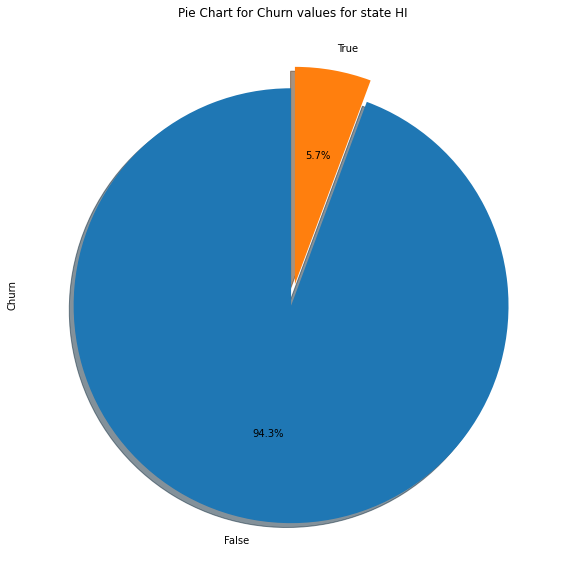

In [ ]:
state_HI ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(10,10))
plt.title('Pie Chart for Churn values for state HI')
plt.show()

 Like almost 15% of customers have churned. let's see what other features say to us and what relation we get after correlated with churn*

*For custumers to churn there may be more reasons one of the reason is Rates of calls let us compare all call rate*
# New Section

In [ ]:
 df['Total day charge'].mean()

30.562307230723075

In [ ]:
df['Total day minutes'].mean()

179.77509750975094

In [ ]:
day_mean = df['Total day charge'].mean()/df['Total day minutes'].mean()
eve_mean = df['Total eve charge'].mean()/df['Total eve minutes'].mean()
night_mean = df['Total night charge'].mean()/df['Total night minutes'].mean()
int_mean = df['Total intl charge'].mean()/df['Total intl minutes'].mean()

In [ ]:
print([day_mean,eve_mean,night_mean,int_mean])

[0.17000300739130672, 0.08500104871485778, 0.04500041448440008, 0.2700500279887107]


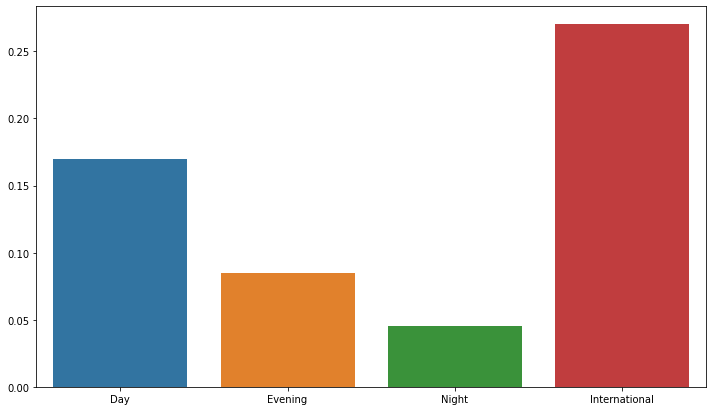

In [ ]:
sns.barplot(x=['Day','Evening','Night','International'],y=[day_mean,eve_mean,night_mean,int_mean])

we can see that International plans have more rate as compare to oters. By putting Bar plot in total minutes and state we can see how many minutes are used in day. As well as we will put multi-line plot in between Total day minutes, Total eve minutes, Total night minutes, Total intl minutes

In [ ]:
avg_total_day_minutes = df.groupby(['State'])['Total day minutes'].mean()

In [ ]:
avg_total_day_minutes

State
AK    178.384615
AL    186.010000
AR    176.116364
AZ    171.604688
CA    183.564706
CO    178.712121
CT    175.140541
DC    171.379630
DE    174.583607
FL    179.533333
GA    185.025926
HI    175.962264
IA    177.613636
ID    178.619178
IL    173.591379
IN    196.525352
KS    191.555714
KY    173.754237
LA    178.376471
MA    180.103077
MD    197.228571
ME    185.262903
MI    180.593151
MN    183.354762
MO    170.506349
MS    177.929231
MT    174.007353
NC    185.145588
ND    187.338710
NE    177.465574
NH    177.328571
NJ    196.225000
NM    171.429032
NV    176.425758
NY    175.114458
OH    183.274359
OK    179.909836
OR    176.246154
PA    188.375556
RI    167.478462
SC    166.441667
SD    189.690000
TN    175.771698
TX    181.516667
UT    183.569444
VA    177.244156
VT    182.031507
WA    178.742424
WI    179.130769
WV    173.950943
WY    180.170130
Name: Total day minutes, dtype: float64

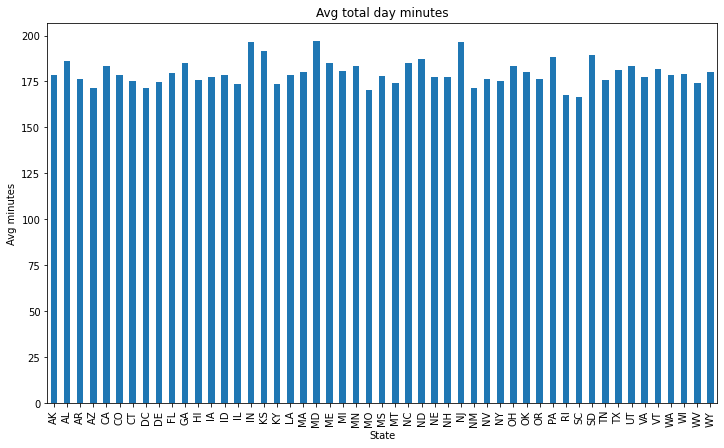

In [ ]:
avg_total_day_minutes.plot(kind='bar')

plt.title('Avg total day minutes')
plt.ylabel('Avg minutes')
plt.xlabel('State')
plt.rcParams['figure.figsize'] = (20,10)

In [ ]:
avg_total_minutes = df.groupby(['State'])['Total day minutes','Total eve minutes','Total night minutes', 'Total intl minutes'].mean()

In [ ]:
avg_total_minutes

,Total day minutes,Total eve minutes,Total night minutes,Total intl minutes
State,,,,
AK,178.384615,184.282692,192.326923,10.019231
AL,186.010000,195.462500,187.285000,10.292500
AR,176.116364,201.047273,205.454545,10.372727
AZ,171.604688,187.748437,194.004687,10.631250
CA,183.564706,198.970588,198.508824,9.867647
CO,178.712121,206.884848,189.898485,9.871212
CT,175.140541,203.828378,205.997297,10.050000
DC,171.379630,196.272222,206.348148,10.605556
DE,174.583607,208.247541,203.900000,10.285246


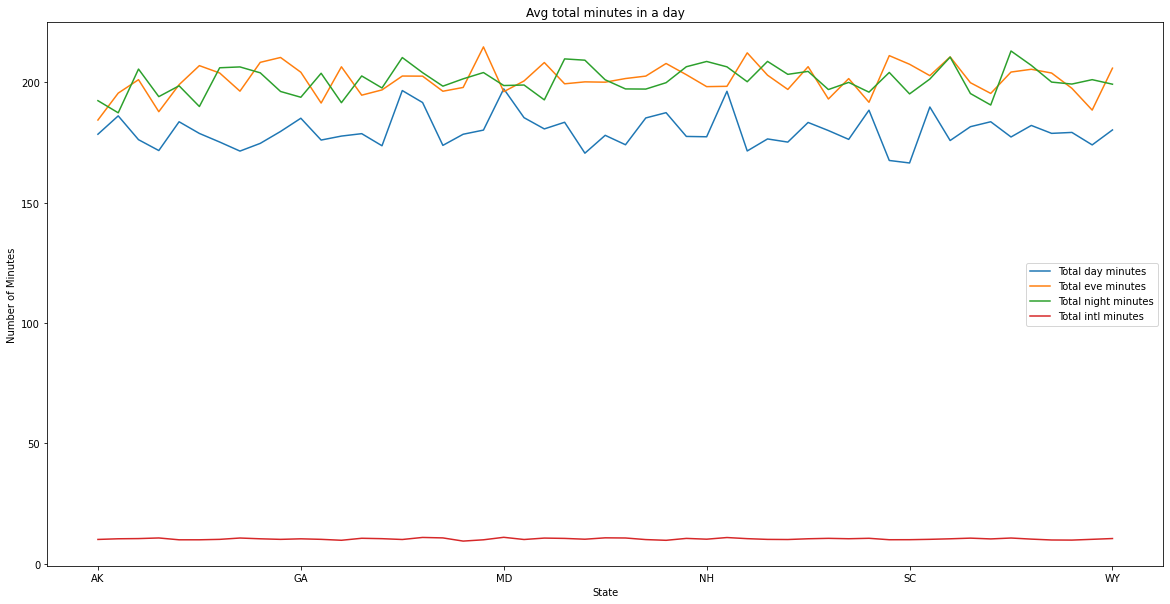

In [ ]:
avg_total_minutes.plot()

plt.title('Avg total minutes in a day')
plt.ylabel('Number of Minutes')
plt.xlabel('State')
plt.rcParams['figure.figsize'] = (20, 10)

 We can see Revenue for company means which type of day charge generates more revenue. The line for International calls is as bottom from this we can say Price for International calls is high but due to low usage Revenue generated is low

Analyzing "International Plan" column

In [ ]:
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [ ]:
df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
International_plan_data = pd.crosstab(df["International plan"],df["Churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


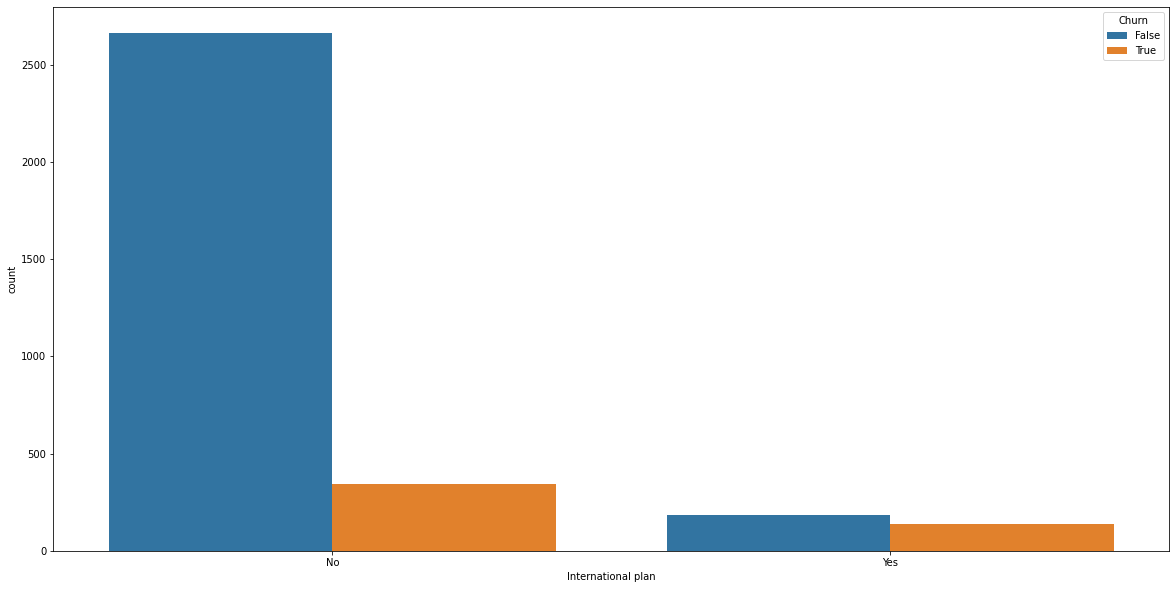

In [ ]:
sns.countplot(x='International plan',hue="Churn",data = df)

The people who bought International plans are churning in big numbers.

In [ ]:
avg_total_value = df.groupby(['State'])['Total day charge','Total eve charge','Total night charge', 'Total intl charge'].mean()
avg_total_value


,Total day charge,Total eve charge,Total night charge,Total intl charge
State,,,,
AK,30.325769,15.664231,8.654808,2.705385
AL,31.621500,16.614500,8.427875,2.779000
AR,29.940000,17.089636,9.245818,2.800727
AZ,29.173125,15.958906,8.730625,2.870625
CA,31.206176,16.913529,8.932941,2.665588
CO,30.381818,17.584848,8.546061,2.665758
CT,29.774324,17.325946,9.270405,2.713378
DC,29.135370,16.684074,9.285741,2.864630
DE,29.680164,17.701311,9.175574,2.778361


# Let  us see the revenue of company from customers. the graph shows the relation between average prices and states.

Text(0.5, 0, 'State')

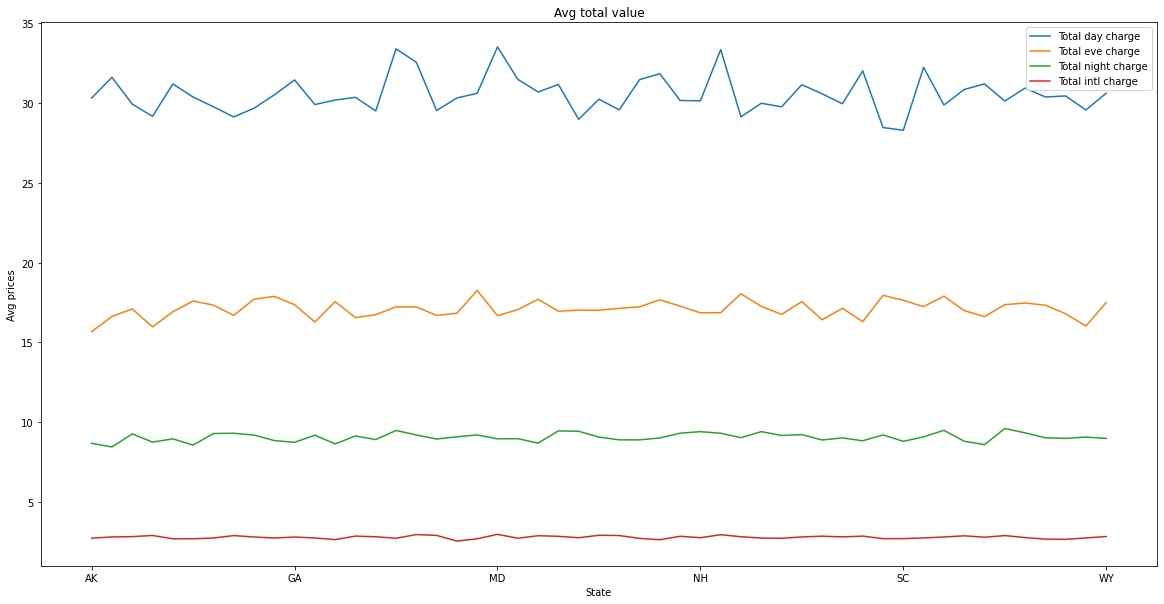

In [ ]:
avg_total_value.plot()
plt.title('Avg total value')
plt.ylabel('Avg prices')
plt.xlabel('State')

In [ ]:
def diff_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1)


    diff_bar(10,2)

# By putting Heat map and histogram simultanously we can co-relate with columns

In [ ]:
churn_data_df = df [['Account length','Area code','International plan','Voice mail plan','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls','Churn']]


In [ ]:
corr_df = churn_data_df.corr()

In [ ]:
corr_df

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


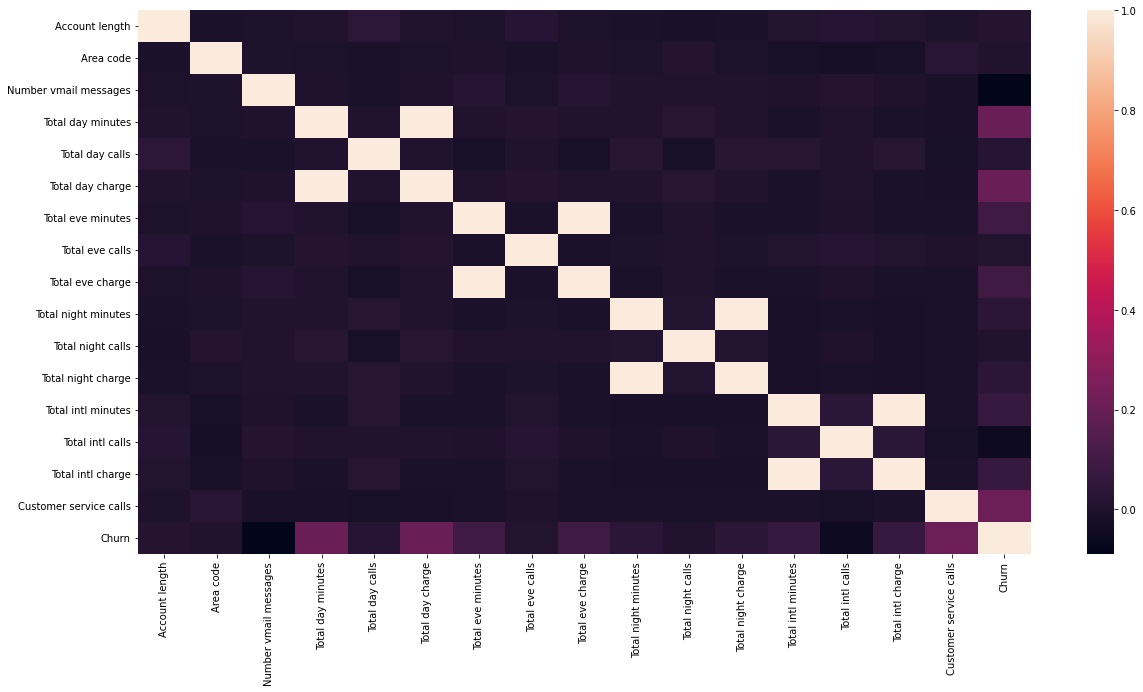

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_df)

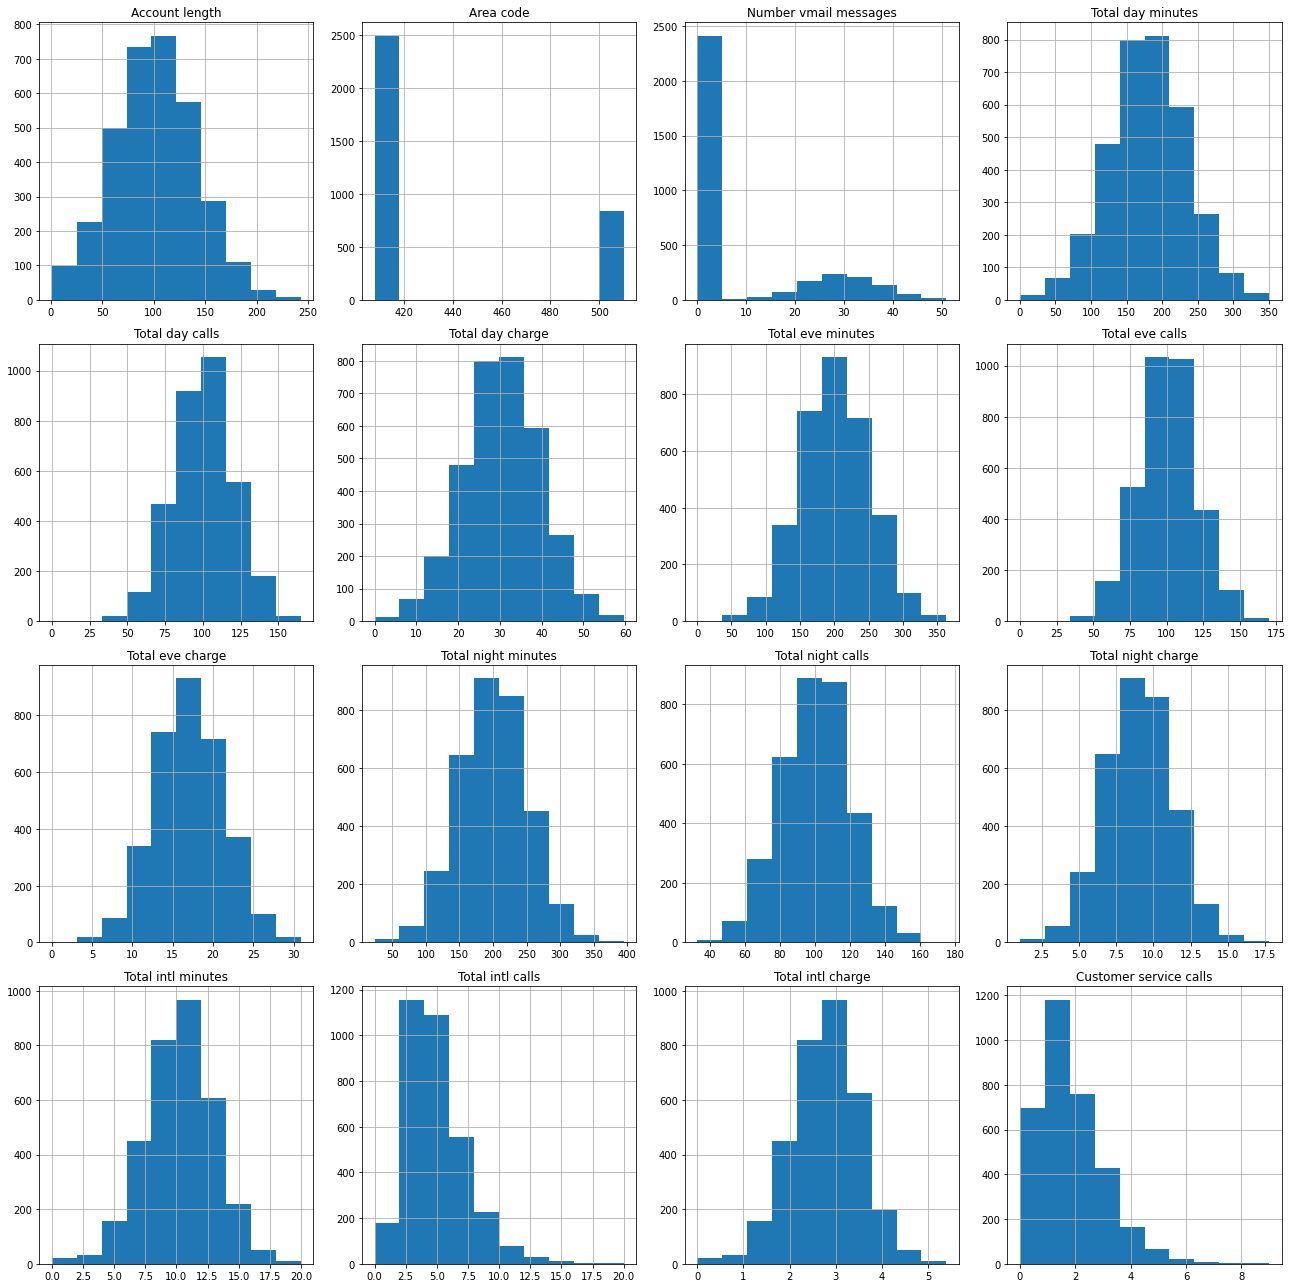

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout();

# Let us see the relation between International plan, Voice mail plan and Customer service calls with respect to Churn by bar plot

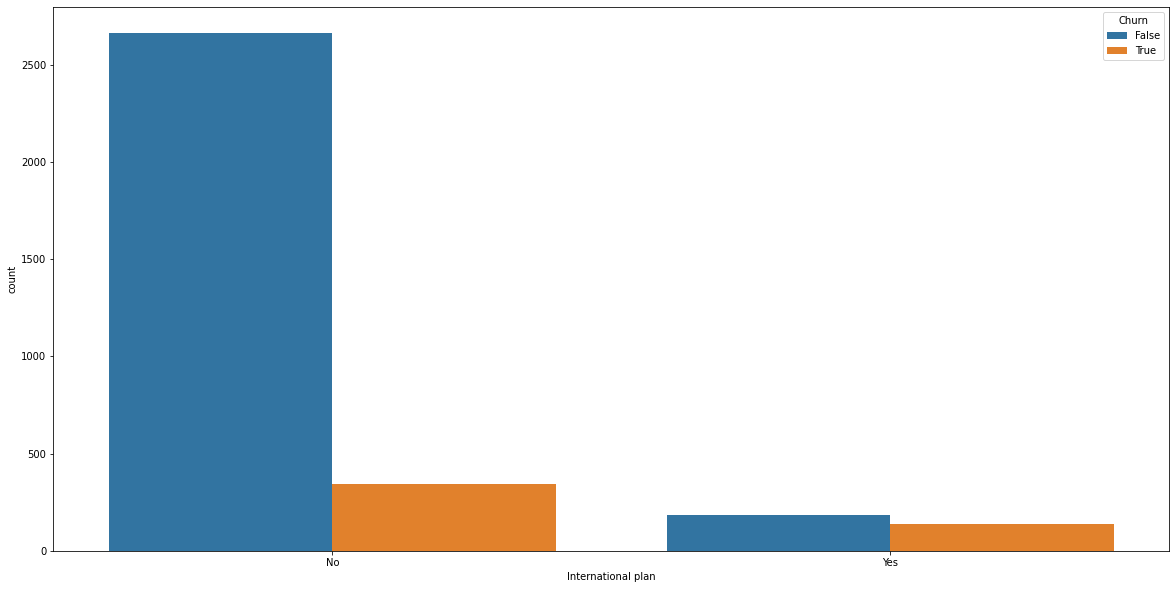

In [ ]:

sns.countplot(x='International plan',hue="Churn",data = df)

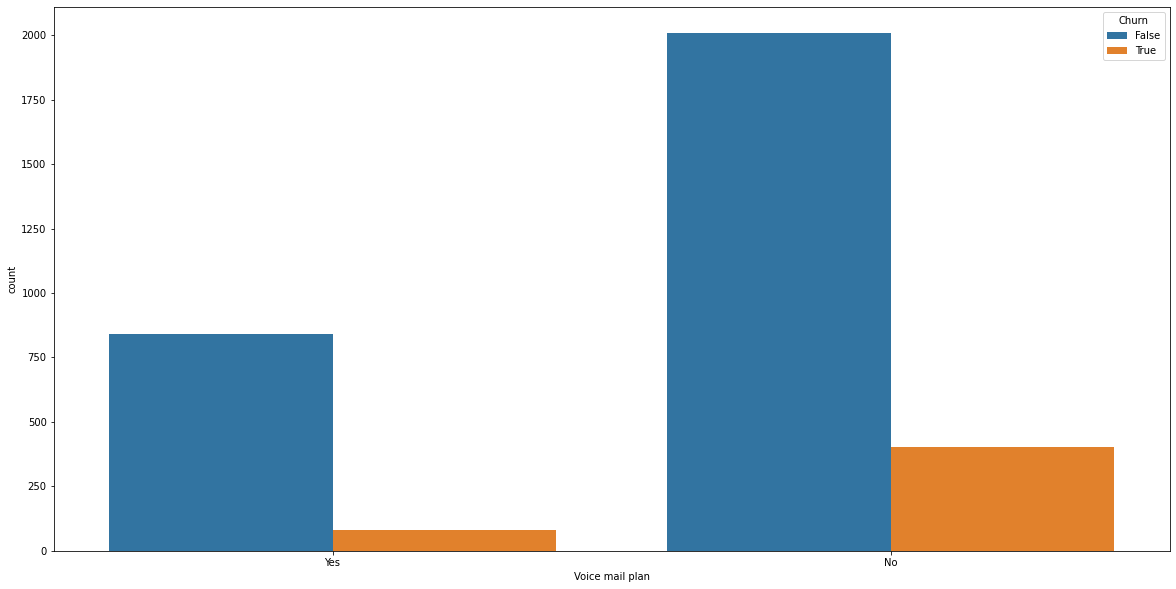

In [ ]:
sns.countplot(x='Voice mail plan',hue="Churn",data = df)

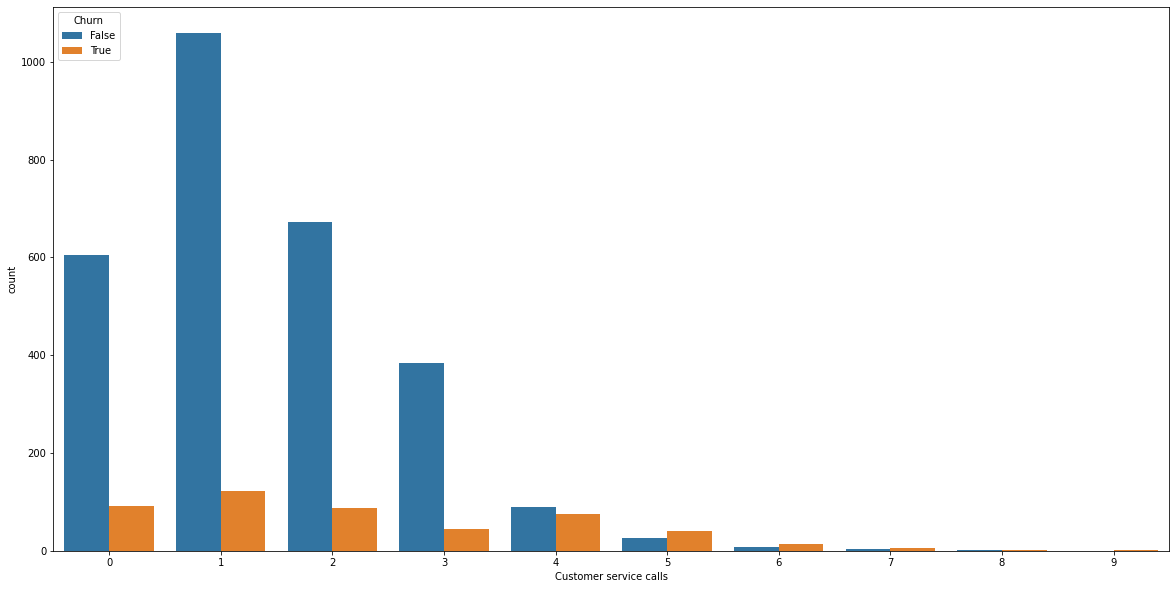

In [ ]:
sns.countplot(x='Customer service calls',hue="Churn",data = df)